In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# 不均衡データセットの作成
np.random.seed(0)
X1 = np.random.rand(7000, 2)  
X2 = np.random.rand(100, 2) *0.2 + 0.9
X = np.concatenate([X1, X2])

y1 = np.array([1 for _ in range(7000)])
y2 = np.array([2 for _ in range(100)])
y = np.concatenate([y1, y2])

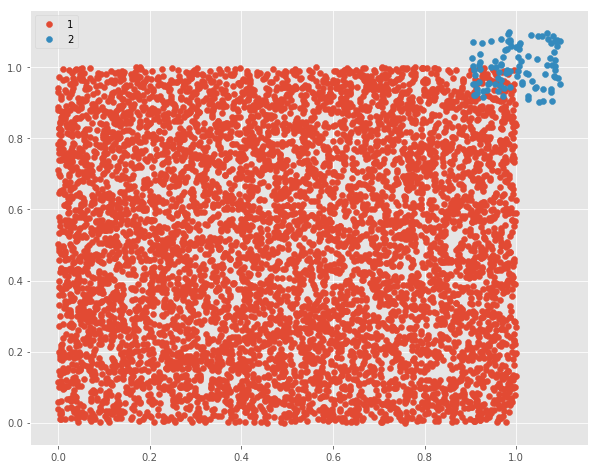

In [3]:
# 実際にデータに偏りがあることを図示して確かめる
gs = plt.GridSpec(1, 1)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(gs[0])

ax.scatter(x=X1[:, 0], y=X1[:, 1] , label='1')
ax.scatter(x=X2[:, 0], y=X2[:, 1],  label='2')
ax.legend()
plt.show()

ランダムフォレストによるクラス分類を行ってみる。

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# データを 7:3 で訓練用データとバリデーションデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/Users/kazuki_hykw/.pyenv/versions/anaconda3-4.3.1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# 不均衡データの考慮がない場合
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('正解率：', accuracy_score(y_test, y_pred))
print('負例の予測数:', len(np.where(y_pred==2)[0]))
print('実際の負例の数:', len(np.where(y_test==2)[0]))

print('負例を正しく識別できている割合:', len(np.where(y_pred==2)[0]) / len(np.where(y_test==2)[0]))

正解率： 0.993896713615
負例の予測数: 21
実際の負例の数: 30
負例を正しく識別できている割合: 0.7


In [6]:
# 不均衡データの考慮をする場合
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('正解率：', accuracy_score(y_test, y_pred))
print('負例の予測数:', len(np.where(y_pred==2)[0]))
print('実際の負例の数:', len(np.where(y_test==2)[0]))

print('負例を正しく識別できている割合:', len(np.where(y_pred==2)[0]) / len(np.where(y_test==2)[0]))

正解率： 0.992018779343
負例の予測数: 25
実際の負例の数: 30
負例を正しく識別できている割合: 0.8333333333333334
